# Facebook performance metrics

## Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd 
from keras.utils import np_utils
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

Using TensorFlow backend.


In [2]:
df = pd.read_csv("dataset_Facebook.csv",";")
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
df.shape

(500, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

## Exploratory Data Analysis (EDA)

### Correlation Matrix

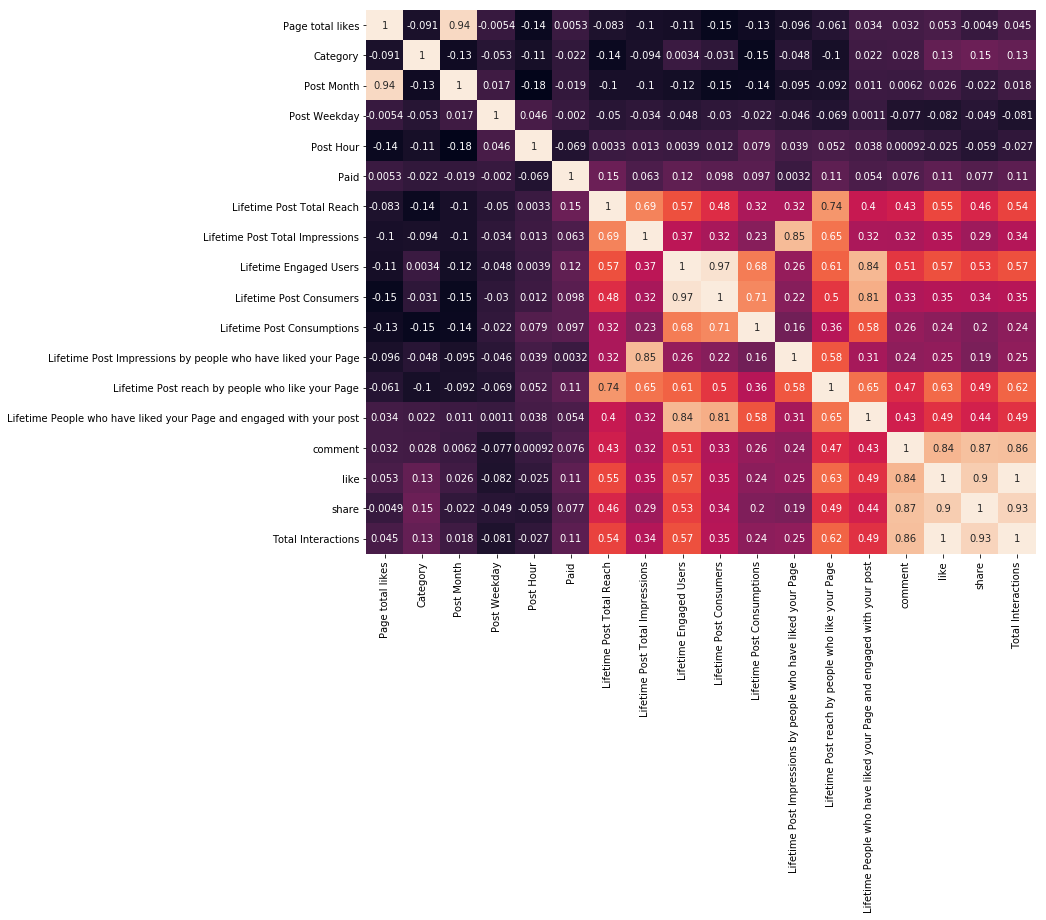

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cbar=False)

### Total Page Likes

In [5]:
df['Page total likes'].describe()

count       500.000000
mean     123194.176000
std       16272.813214
min       81370.000000
25%      112676.000000
50%      129600.000000
75%      136393.000000
max      139441.000000
Name: Page total likes, dtype: float64

In [4]:
df.iloc[:,0].unique()

array([139441, 138414, 138458, 138895, 138353, 138329, 138185, 137893,
       137177, 137059, 137020, 136736, 136642, 136393, 136013, 135713,
       135700, 135617, 135428, 135195, 134879, 133679, 133594, 133451,
       132817, 132201, 131956, 131808, 131728, 131630, 131300, 130791,
       129600, 128032, 127082, 126424, 126345, 126141, 125612, 124940,
       123047, 121540, 120050, 119198, 117764, 116435, 116091, 115893,
       115368, 113028, 111620, 109670, 107907, 106928, 104070, 102112,
       100732,  98195,  96749,  93684,  93577,  93470,  93363,  93256,
        93149,  93042,  92935,  92828,  92721,  92614,  92507,  92400,
        92293,  92186,  92079,  91972,  91865,  91758,  91651,  91544,
        91437,  91330,  91223,  91116,  91009,  86909,  86491,  85979,
        85093,  81370], dtype=int64)

Text(0.5, 1.0, 'Total pages likes')

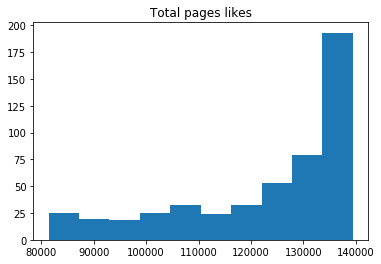

In [5]:
plt.hist(df.iloc[:,0])
plt.title("Total pages likes")

### Category

In [6]:
df.iloc[:,1].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

Text(0.5, 1.0, 'Different types of post compared')

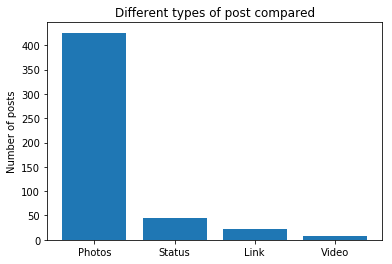

In [7]:
objects = ('Photos', 'Status', 'Link', 'Video')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.iloc[:,1].value_counts().values)
plt.xticks(y_pos, objects)
plt.ylabel('Number of posts')
plt.title('Different types of post compared')

Text(0, 0.5, 'Number of posts')

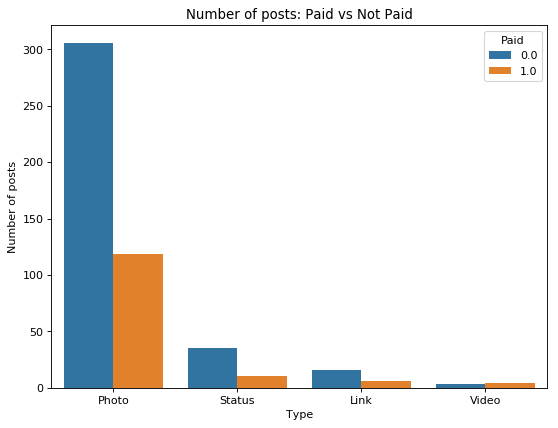

In [16]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

sns.countplot(x='Type',hue='Paid',data=df)
plt.title("Number of posts: Paid vs Not Paid")
plt.ylabel("Number of posts")

### Post Month

Text(0.5, 1.0, 'Number of posts for each month')

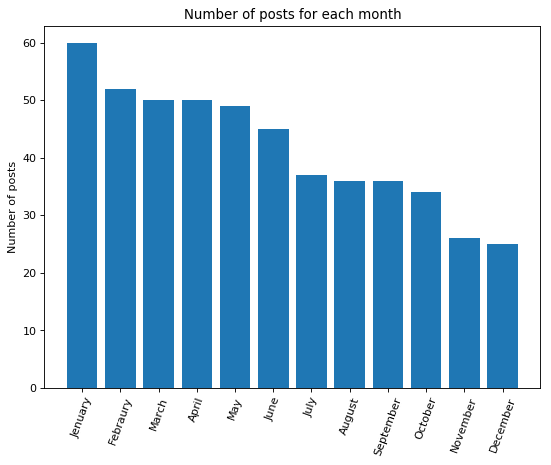

In [8]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

objects = ('Jenuary', 'Febraury', 'March', 'April','May','June','July','August','September','October','November','December')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.iloc[:,3].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each month')

### Post Weekday

Text(0.5, 1.0, 'Number of posts for each week-day')

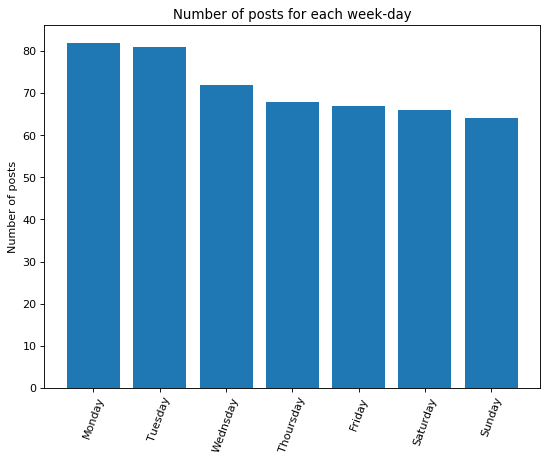

In [9]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

objects = ('Monday', 'Tuesday', 'Wednsday', 'Thoursday','Friday','Saturday','Sunday')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.iloc[:,4].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each week-day')

### Post Hour

In [10]:
#np.unique(df.iloc[:,5])
#print(len(df.iloc[:,5].value_counts().values))
a = df.iloc[:,5].value_counts().values
a = np.insert(a, 20, 0)
a = np.insert(a, 0, 0)
##np.arange(24)
# At mindight and 9pm, no messagess were sent, therefore I added 2 zeroes at these locations in the dataset column.

Text(0.5, 1.0, 'Number of posts for each hour of the day')

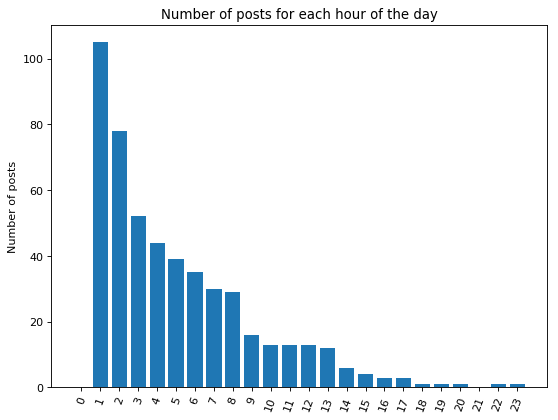

In [11]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

objects = (np.arange(24))
y_pos = np.arange(len(objects))
# print(len(y_pos))
# print(len(a))
plt.bar(y_pos, a)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each hour of the day')

### Paid

Text(0.5, 1.0, 'Number of posts: Free vs Paid')

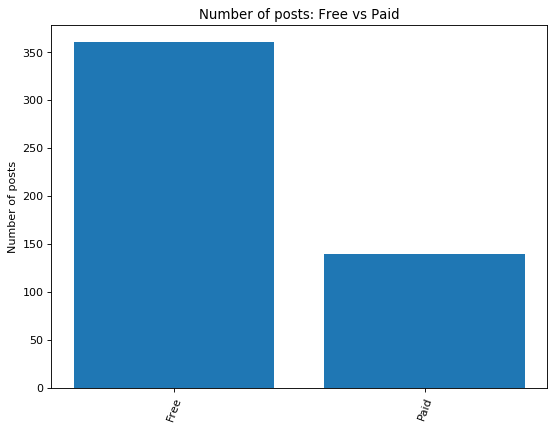

In [12]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

objects = ('Free', 'Paid')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.iloc[:,6].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts: Free vs Paid')

Text(0.5, 1.0, 'Number of posts: Free vs Paid')

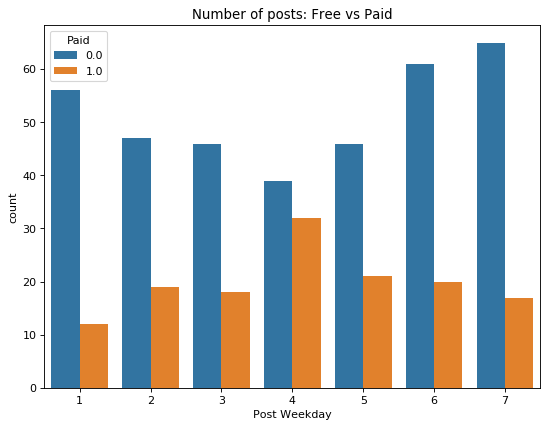

In [10]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='Post Weekday',hue='Paid',data=df)
plt.title("Number of posts: Free vs Paid")

### Comments

Text(0.5, 1.0, 'Comments per post distribution')

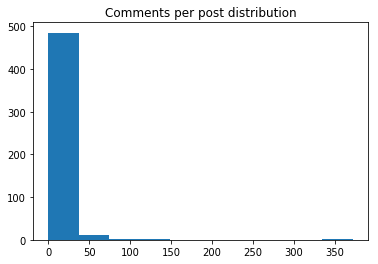

In [13]:
plt.hist(df.iloc[:,len(df.columns)-4])
plt.title("Comments per post distribution")

### Likes

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Likes per post distribution')

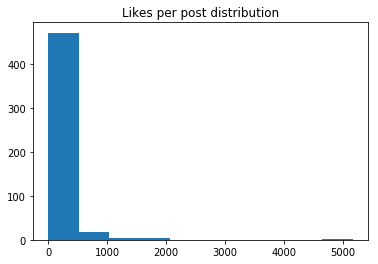

In [28]:
plt.hist(df.iloc[:,len(df.columns)-3])
plt.title("Likes per post distribution")

### Shares

Text(0.5, 1.0, 'Share per post distribution')

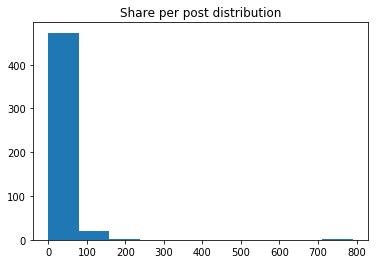

In [29]:
plt.hist(df.iloc[:,len(df.columns)-2])
plt.title("Share per post distribution")

### Lifetime Data Analysis

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


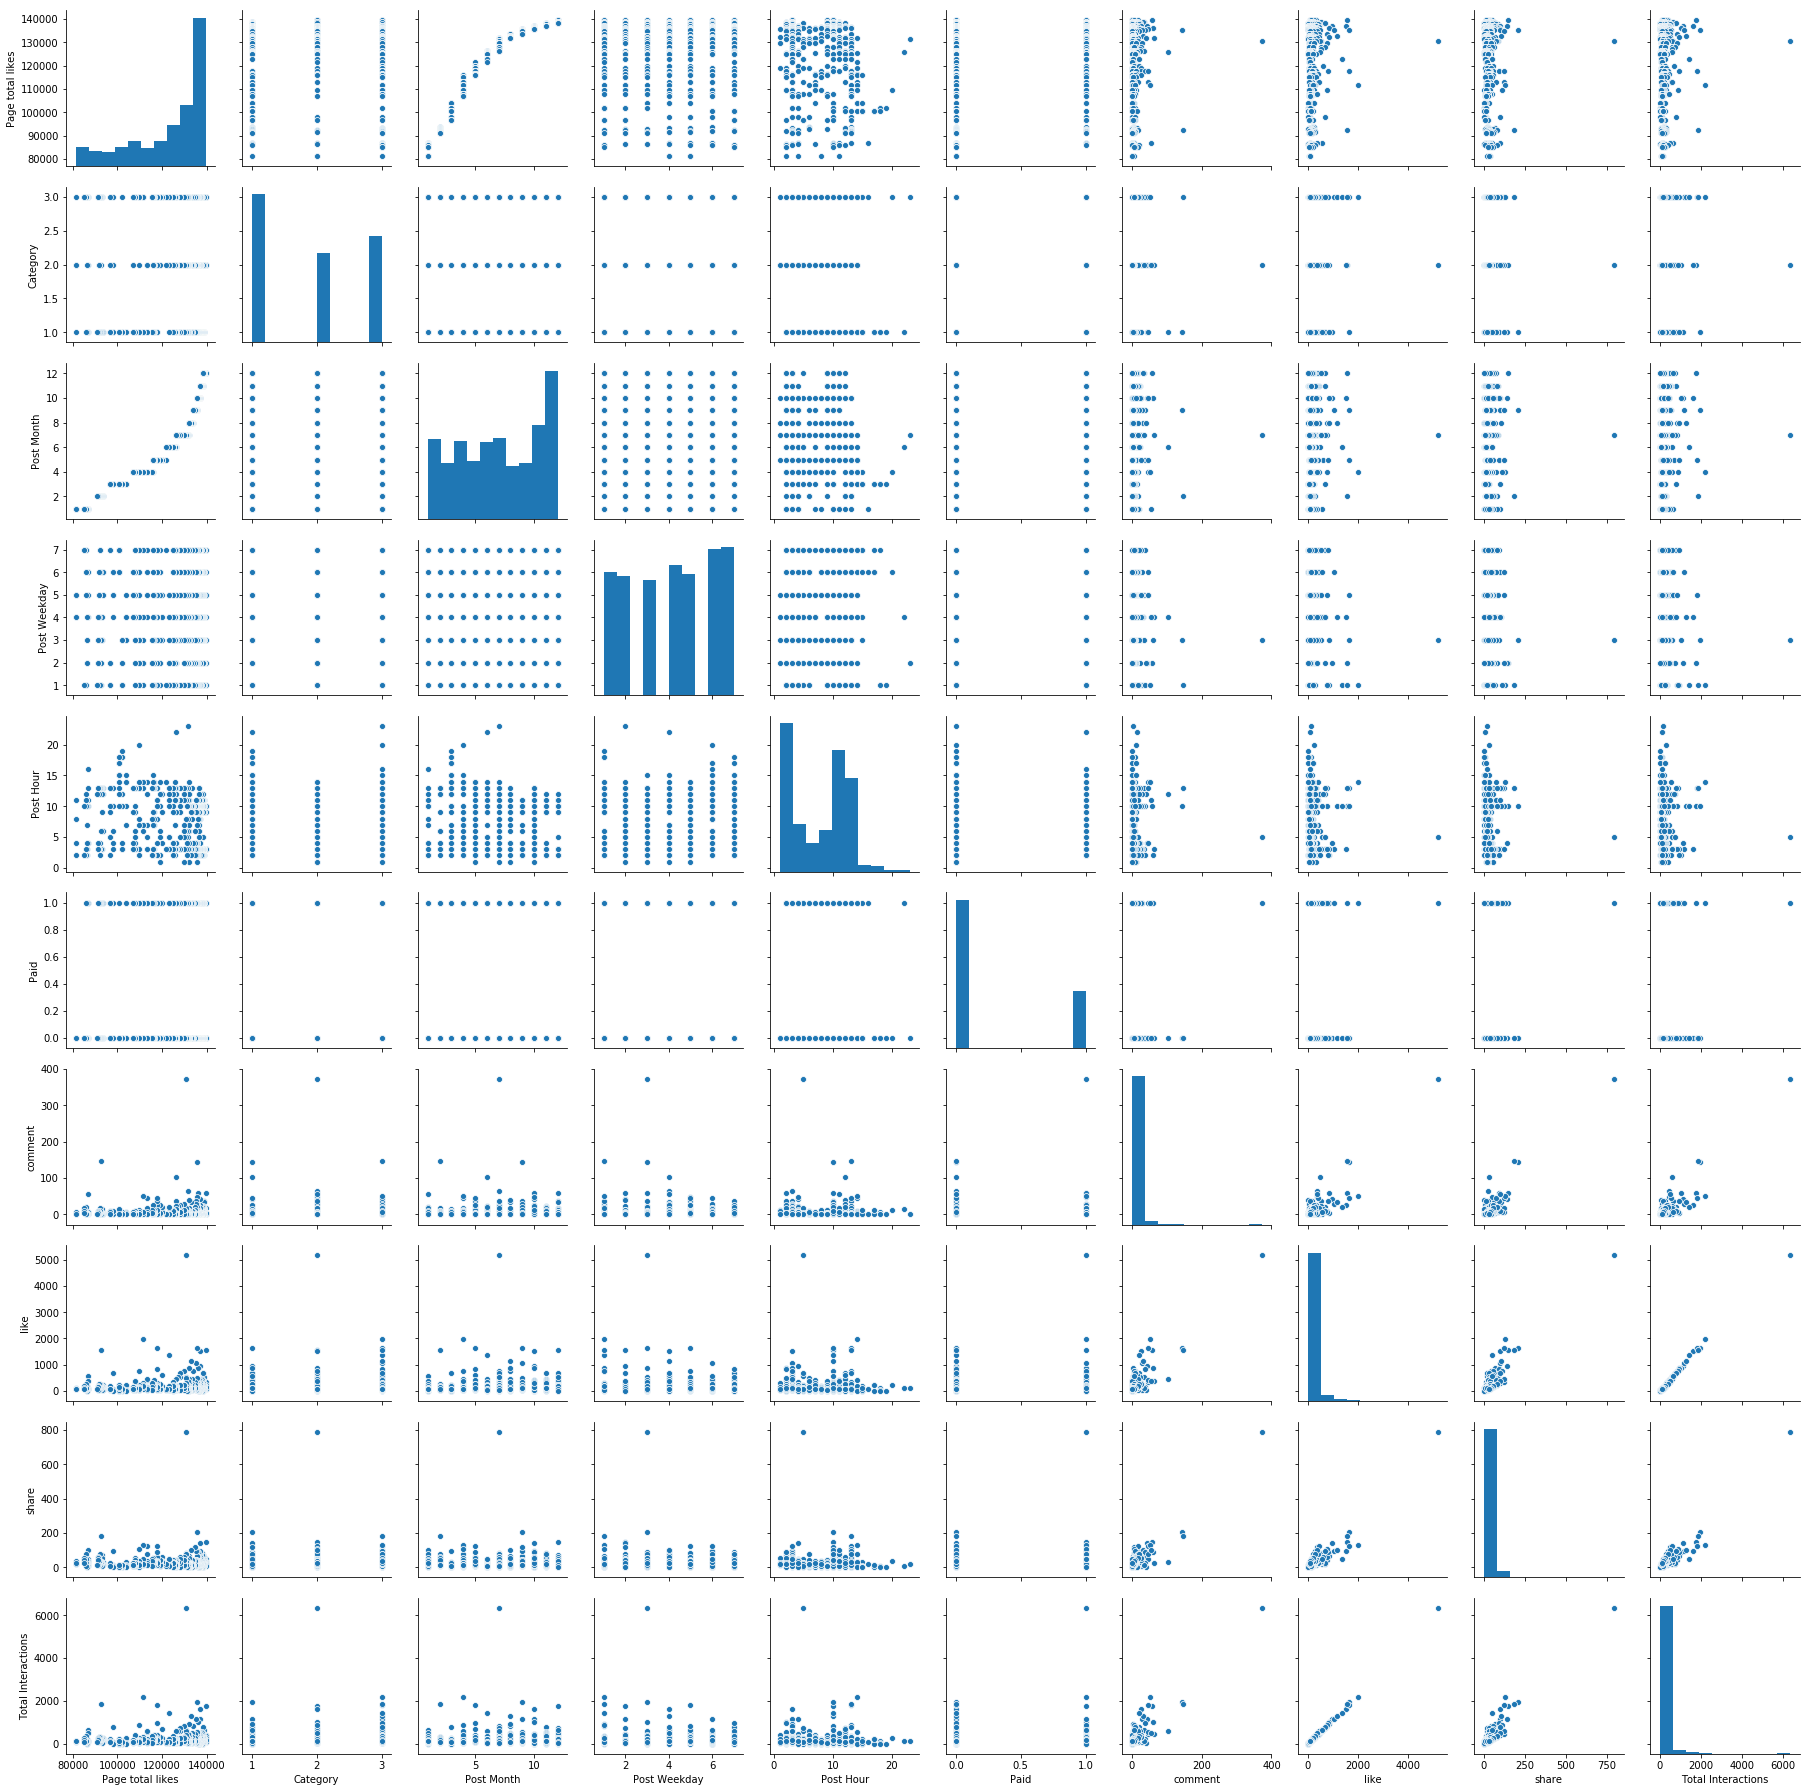

In [6]:
dfplot = df.drop(df.columns[7:15],axis =1)
sns.pairplot(data=dfplot)

## Machine Learning

In [17]:
# Work in Progress